# Problem 2: Dimensionality Reduction

## Part A: Load the Data

Load the data from `sample_dat.mat`. Compute the peristimulus time histogram (PSTH) of the data. Plot the PSTHs and note any trends. Now pre-process the data by using a Gaussian Process (GP) prior to smooth the data. A GP prior smooths the data by creating a correlation structure that makes nearby points in time have similar values. Specifically, if we treat each neuron’s PSTH as $x_n$, which is a $T$-dimensional vector, the prior distribution is $x_n \sim N(0, K)$, where the covariance matrix $K$ is defined as $K_{ij} = A \cdot e^{-(t_i-t_j)^2/l}$. Use the same approach as Problem 1 to get an estimate of the smoothed PSTH per neuron. Compare the two sets of PSTHs visually and remark on any details you notice. 

In [1]:
from sthom215_problem_2_ex_2 import *
import numpy as np
data = load_mat('sample_dat')
# (trial, neuron, spikes_per_bin)
mat = np.stack(list(data.values()), axis=0)

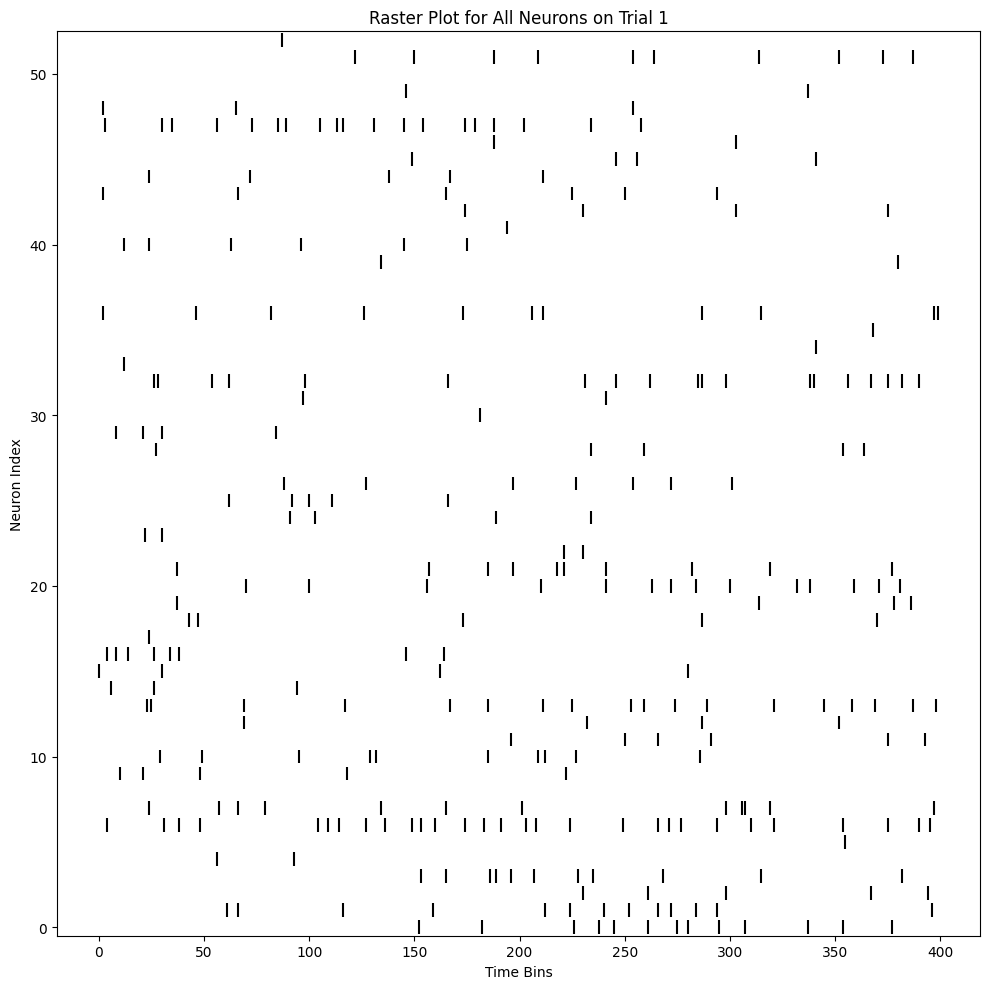

In [2]:
get_PSTH(1,dat=mat)

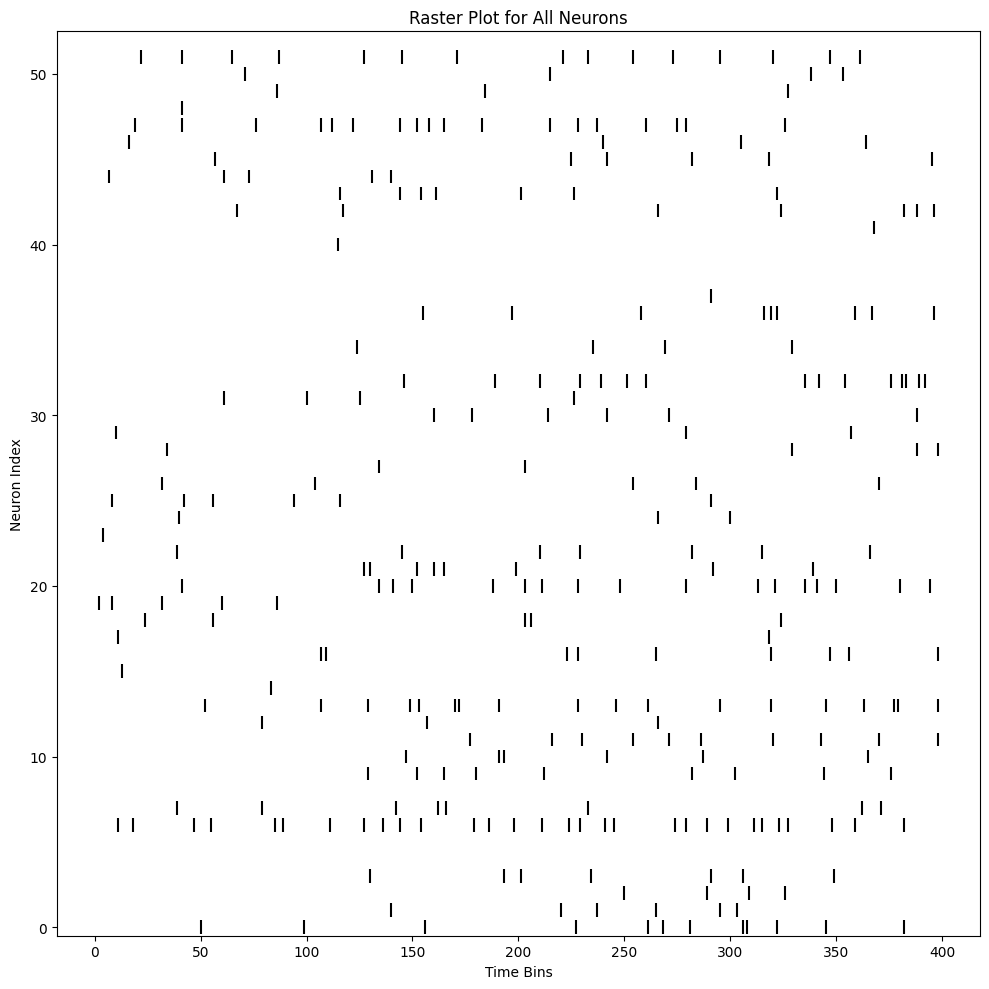

In [5]:
from sthom215_problem_2_ex_2 import smoothing
# test for single trial
trial1 = mat[0,:,:]
smooth_trial1 = smoothing(trial1, 1e-2, 1)
get_PSTH(dat=smooth_trial1)
